Привет! меня зовут Люман Аблаев. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на красные комментарии ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:


<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ..
</div>
<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление</font>
* Спасибо за  качественную работу, было интересно ее проверять.
- Я оставил некоторые советы надеюсь они будут полезными или интересными.

- Есть небольшие недочеты, но думаю у тебя не составить труда их исправить
- Жду обновленную работу!


Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b>
    
Спасибо за ревью, все замечания исправил!
</div>

<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление[2]</font>
* Спасибо за оперативность
- Приятно видеть фидбек 
- Недочеты исправлены - работа полностью корректна
- Рад был быть полезен. Удачи в дальнейшем обучении!

# Проект: Выбор локации для скважины

Для нефтедобывающей компании  «ГлавРосГосНефть» необходимо решить, где бурить новые скважины, по предоставленнным пробам нефти в трёх регионах: в каждом 100 000 месторождений, где измерили:
- уникальный идентификатор скважины: `id`;
- качество нефти:
    - `f0`;
    - `f1`;
    - `f2`;
- объём её запасов: `product `.

Шаги для выбора локации:

- в избранном регионе ищут месторождения, для каждого определяют значения признаков;
- строят модель и оценивают объём запасов;
- выбирают месторождения с самым высокими оценками значений;
- прибыль равна суммарной прибыли отобранных месторождений.

Условия задачи:
- для обучения модели подходит только линейная регрессия;
- при разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки;
- бюджет на разработку скважин в регионе — 10 млрд рублей;
- один баррель сырья приносит 450 рублей дохода;
- после оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%, среди них необходимо выбрать регион с наибольшей средней прибылью.

В данном проекте будут решены две задачи:
- построить модель машинного обучения для предсказания объёма запасов в скважине, которая поможет определить регион, где добыча принесёт наибольшую прибыль;
- анализ возможной прибыли и рисков техникой *Bootstrap.*

В проекте будет несколько блоков:
- загрузка и анализ данных;
- обучение и проверка модели;
- подготовка к расчёту прибыли;
- расчет прибыли и убытков;
- общий вывод.

## Загрузка и анализ данных

### Загрузка данных и изучение общей информации

Для начала работы импортируем (установим) все необходимые в прокте библиотеки:

In [1]:
! pip install phik -q
! pip install typing-extensions==4.10.0
! pip install ydata-profiling -q
from ydata_profiling import ProfileReport

  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.3.0
    Uninstalling typing-extensions-4.3.0:
      Successfully uninstalled typing-extensions-4.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.0.17 requires pydantic!=1.8,!=1.8.1,<1.9.0,>=1.7.4, but you have pydantic 2.7.3 which is incompatible.
spacy 3.2.0 requires pydantic!=1.8,!=1.8.1,<1.9.0,>=1.7.4, but you have pydantic 2.7.3 which is incompatible.


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik

from scipy import stats

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error, make_scorer, r2_score

from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer



<div class="alert alert-block alert-success">
<b>Успех:</b> Импорты и настройки на месте
</div>

Загрузим все данные и посмотрим первые их строки:

In [3]:
#Считываем данные и сохраняем в переменные

# Данные геологоразведки нулевого региона geo_data_0
try:
    geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
except:
    geo_data_0 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_0.csv')

# Данные геологоразведки первого региона geo_data_1
try:
    geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
except:
    geo_data_1 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv')
    
# Данные геологоразведки второго региона geo_data_2
try:
    geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    geo_data_2 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv')

In [4]:
# выводим первые 5 строк каждого датафрейма
for i in geo_data_0, geo_data_1, geo_data_2:
    display(i.head(5))

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Данные считались корректно.

Посмотрим информацию о датафреймах с помощью метода `info()`:

In [5]:
# выводим информацию о каждом датафрейме
for i in geo_data_0, geo_data_1, geo_data_2:
    display(i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Пропусков нет, типы данных столбцов соответствуют наполнению.

Посмотрим на информацию о признаках в датафреймах с помощью метода `describe`

In [6]:
# информация о признаках в датфреймах
for i in geo_data_0, geo_data_1, geo_data_2:
    display(i.describe())

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Вывод:
- данные загрузились корректно;
- пропусков нет, типы данных столбцов соответствуют наполнению;
- признак `f0` и `f1` во всех трех регионах в разных пределах;
- признак `f2` в нулевом и втором регионе в одинаковых пределах;
- объемы запасов в нулевом и втором регионе выше чем в первом.



<div class="alert alert-block alert-success">
<b>Успех:</b> Первичный осмотр проведен
</div>

###  Проверка на наличие неявных дубликатов

Посмотрим на количество дубликатов без столбца `id`:

In [7]:
for i, j in zip ([geo_data_0, geo_data_1, geo_data_2], ['geo_data_0', 'geo_data_1', 'geo_data_2']):
    print(f'Количество неявных дубликатов в {j}: {i.drop("id", axis=1).duplicated().sum()}')

Количество неявных дубликатов в geo_data_0: 0
Количество неявных дубликатов в geo_data_1: 0
Количество неявных дубликатов в geo_data_2: 0


Неявных дубликатов нет.

### Исследовательский анализ

Построим гистограммы и "ящики с усами" для признаков, предварительно создав функцию для их построения:

In [8]:
# создадим функцию для построения гистограммы (барплота) и ящика с усами для количетсвенных признаков
def hist_and_boxplot (df, parametr, number_area):
    # df - датафрейм
    # parametr - признак для построения
    # number_area - номер региона
    
    # построение фигур для графиков
    fig, axes = plt.subplots(1, 2, figsize=(18, 9))
    plt.suptitle(f'Распределение признака {parametr} в {number_area} регионе', fontsize=20)
    
    # построение гистограммы
    df[parametr].hist(bins=20, grid=True, ax=axes[0])
    axes[0].set_ylabel('Количество', fontsize=15)
    axes[0].set_xlabel(f'Значение {parametr}', fontsize=15)
        
    # построение ящика с усами
    df.boxplot(column=parametr, ax=axes[1])
    axes[1].set_ylabel(f'Значение {parametr}', fontsize=15)
    
    plt.show()

Посмотрим на распределения признака `f0` во всех датафреймах:

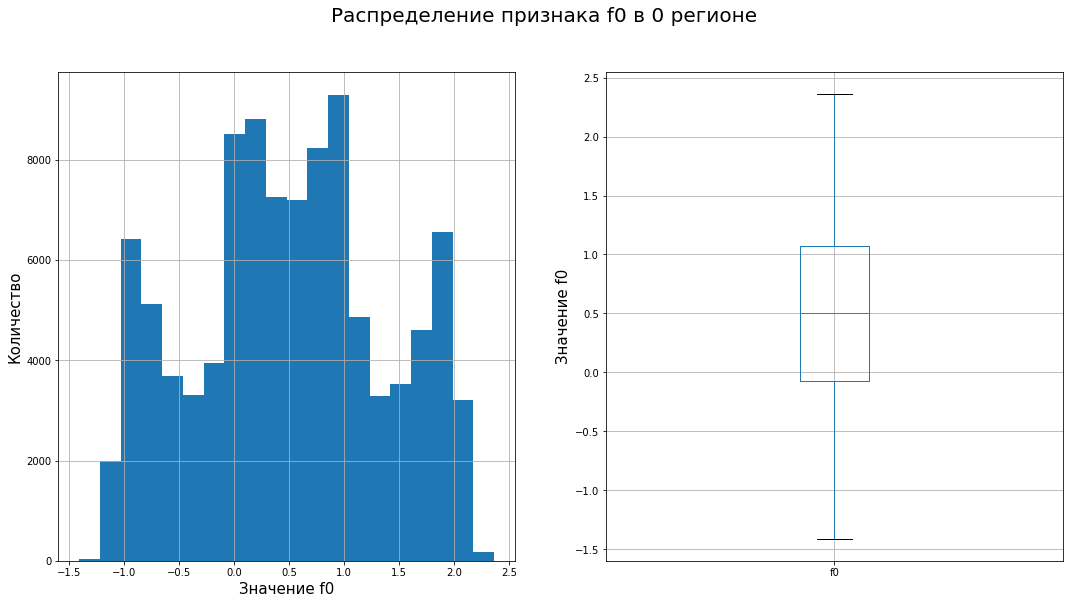

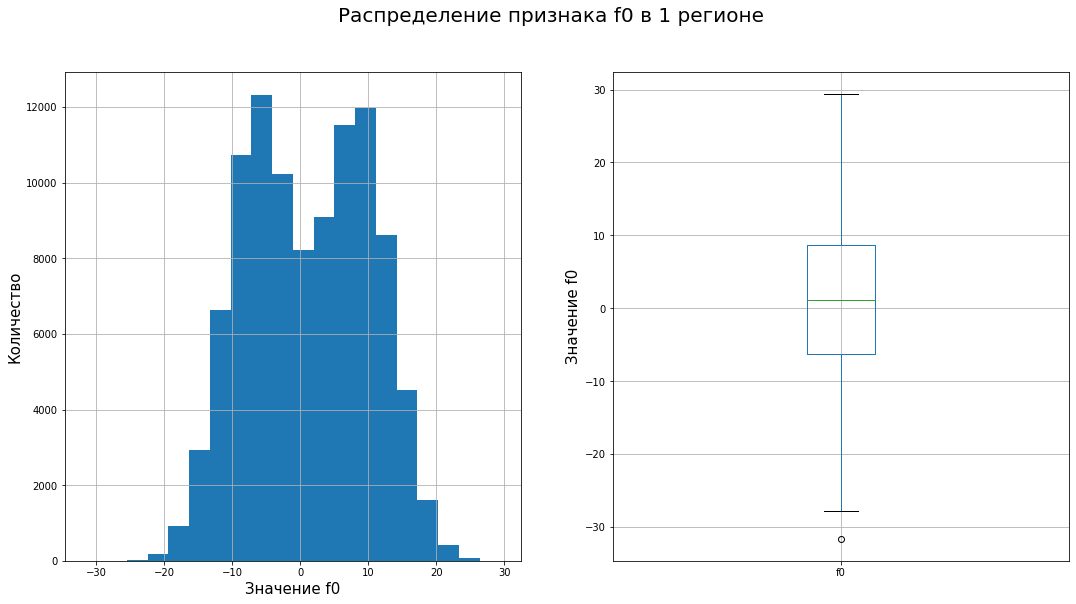

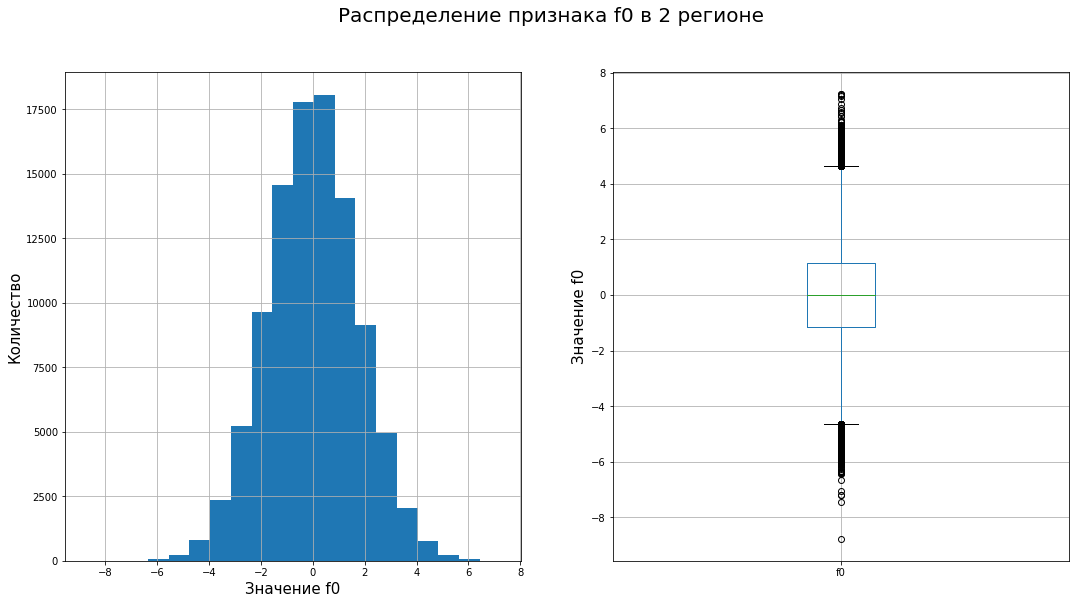

In [9]:
for i, j in zip ([geo_data_0, geo_data_1, geo_data_2], range(3)):
    hist_and_boxplot (i, 'f0', j)

По графикам видно, что:
- сильных выбросов в распределениях признака `f0` нет;
- в нулевом и первом регионе распределение признака `f0` не похоже на нормальное (несколько пиков);
- во втором регионе распределение похоже на нормальное.

Посмотрим на распределения признака `f1` во всех датафреймах:

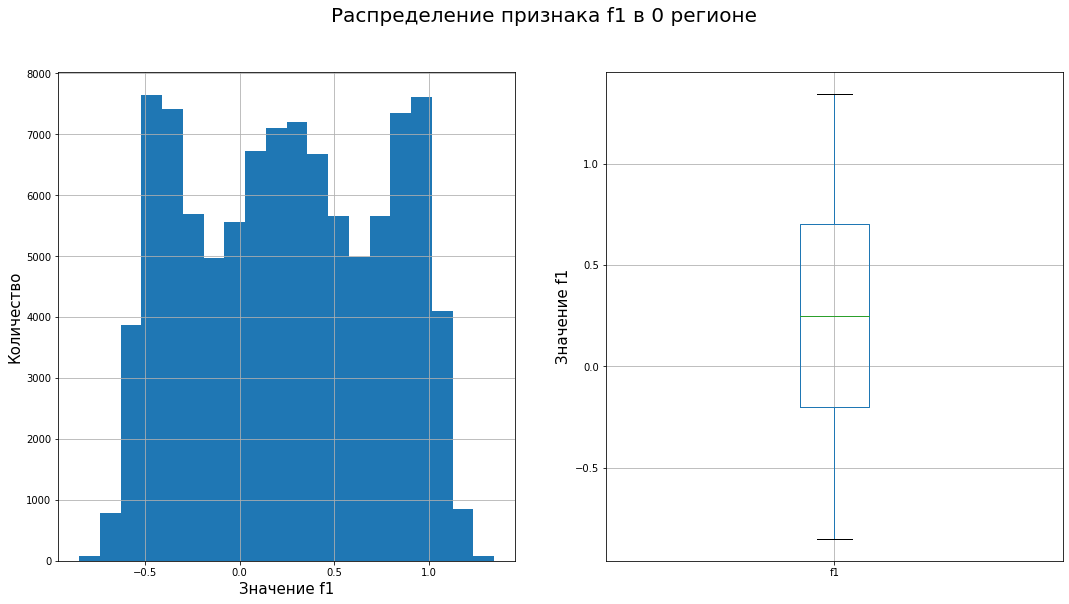

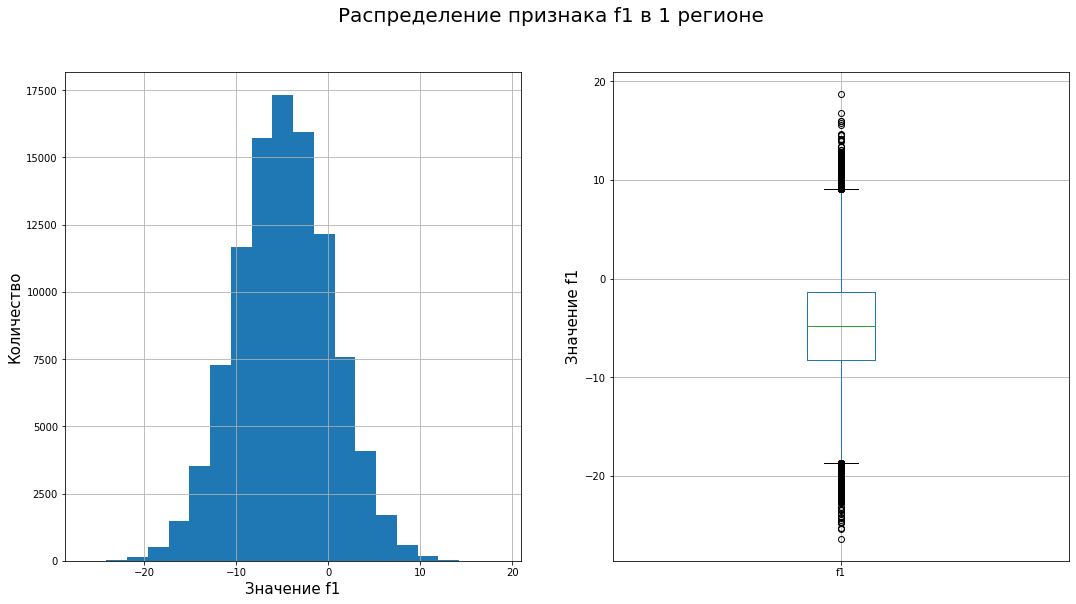

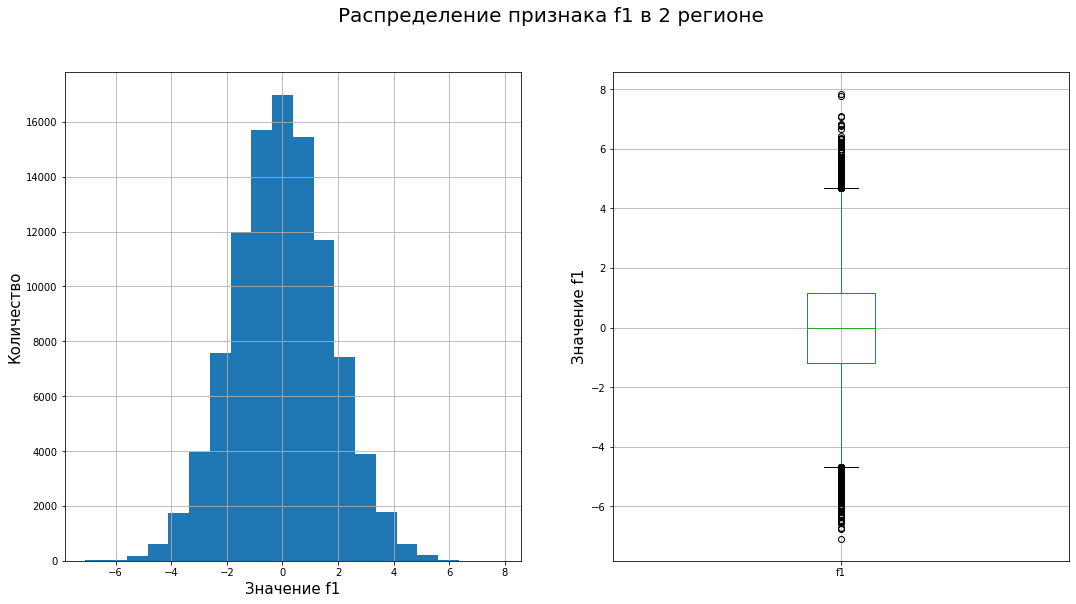

In [10]:
for i, j in zip ([geo_data_0, geo_data_1, geo_data_2], range(3)):
    hist_and_boxplot (i, 'f1', j)

По графикам видно, что:
- сильных выбросов в распределениях признака `f1` нет;
- в нулевом регионе распределение признака `f1` не похоже на нормальное (несколько пиков);
- в первом и втором регионе распределение похоже на нормальное.

Посмотрим на распределения признака `f2` во всех датафреймах:

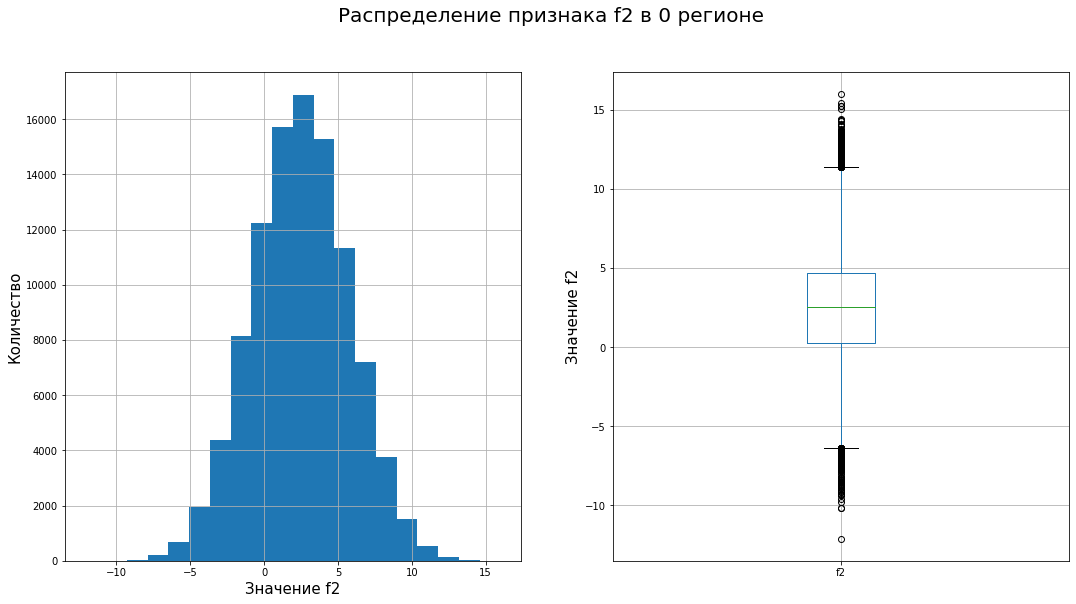

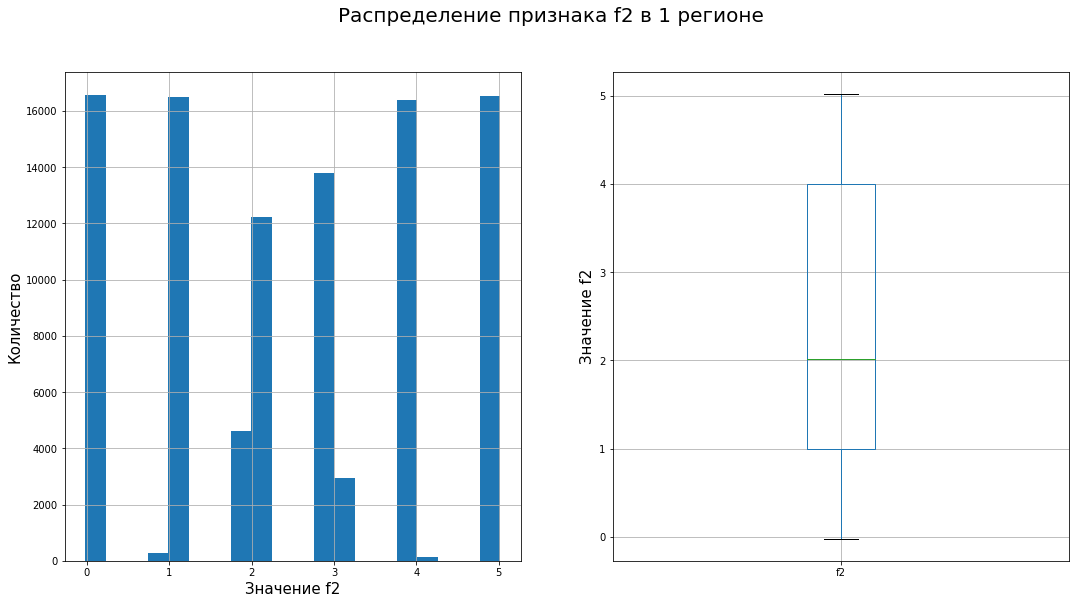

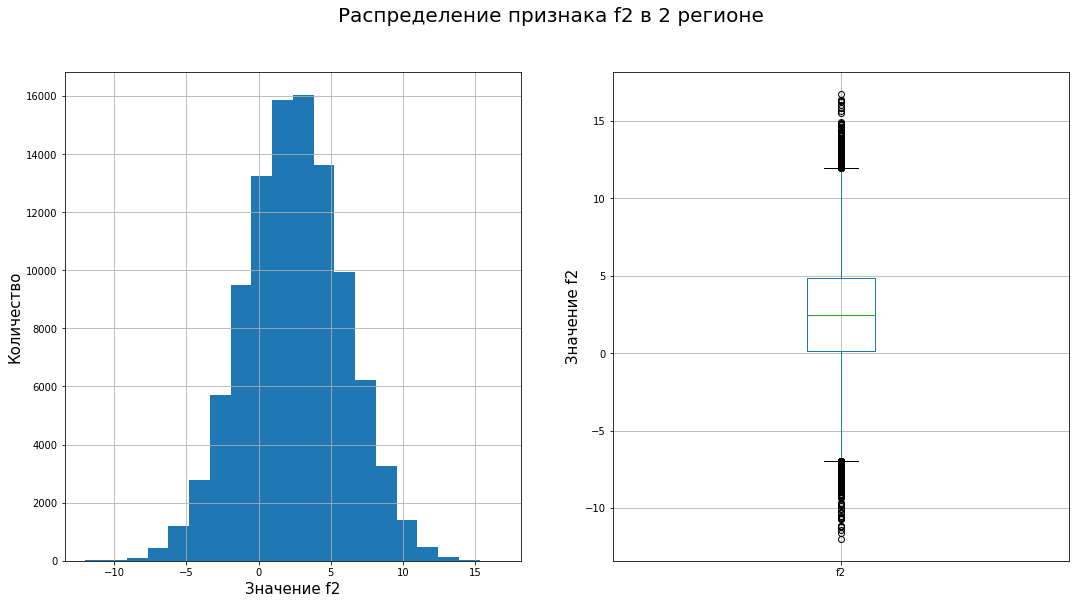

In [11]:
for i, j in zip ([geo_data_0, geo_data_1, geo_data_2], range(3)):
    hist_and_boxplot (i, 'f2', j)

По графикам видно, что:
- сильных выбросов в распределениях признака `f2` нет;
- в первом регионе распределение признака `f2` не похоже на нормальное (много пиков);
- в нулевом и втором регионе распределение похоже на нормальное.

Вывод по исследовательскому анализу:
- значения одних и тех же признаков имеют разное распределение и пределы в разных регионах;
- только во втором регионе все признаки распределены нормально.

### Корреляционный анализ

Для нахождения зависимостей признаков воспользуемся коэффициентом Фи (указав все признаки и объем запасов в параметре `interval_cols`, где отображаются непрерывные признаки):

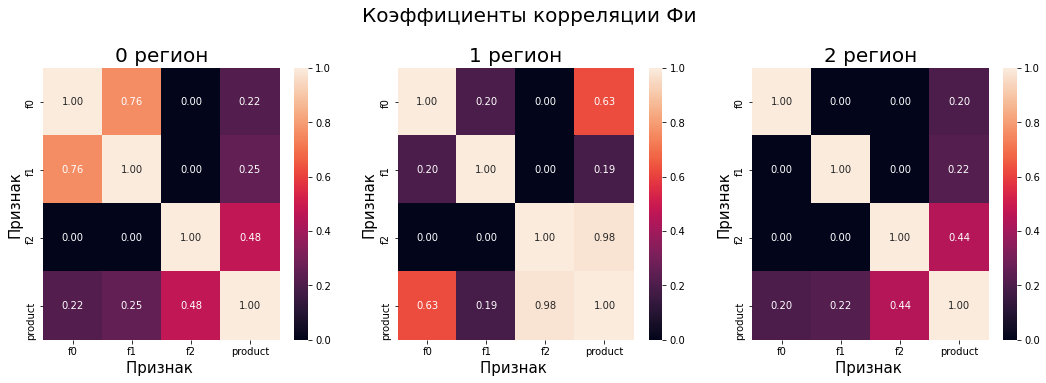

In [12]:
# построение фигуры для графиков
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
plt.suptitle(f'Коэффициенты корреляции Фи', fontsize=20, y=1.05)
    
# построение тепловой карты
for i, j in zip([geo_data_0, geo_data_1, geo_data_2], range(3)):
    sns.heatmap(i.drop('id', axis=1).phik_matrix(interval_cols=['f0', 'f1', 'f2', 'product']),
                annot=True,
                fmt=".2f",
                ax=axes[j]               
               )
    axes[j].set_title(f'{j} регион', fontsize=20)
    axes[j].set_ylabel('Признак', fontsize=15)
    axes[j].set_xlabel('Признак ', fontsize=15)

По тепловой карте коэффициентов корреляции Фи видно, что:
- в нулевом и втором регионах признаки одинаково влияют на объем запасов `product`:
    - признаки `f0` и `f1` слабо влияют на объемы запасов (коэффициент Фи от 0,20 до 0,25);
    - признак `f2` немного сильнее влияет на `product` (коэффициент Фи 0,44-0,48);
- в первом регионе наблюдается очень сильная корреляция между `f2` и `product` (коэффициент Фи 0,98), средняя корреляция также наблюдается у признака `f0` (коэффициент Фи 0,63) и слабая корреляция с признаков `f1` (коэффициент Фи 0,19);
- в нулевом регионе наблюдается высокая зависимость признаков `f0` и `f1` (коэффициент Фи 0,76), но о мультикорллинеарности речи не идет.

Посмотрим на диаграммы рассеяния признаков:


<div class="alert alert-block alert-info">
<b>Совет:</b> Можно было бы еще выдвинуть предположение, откуда такая высокая корреляция во 2 регионе с целевым признаком могла возникнуть
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> 
    
Утечка данных?
</div>


<div class="alert alert-block alert-info">
<b>Совет[2]:</b> Возможно, но не явное.  Могу предположить, что для регионов с определенными условиями (климатическими, геологическими) этот признак является практически дублирующим целевой. Например ""как часто местные жители обнаруживали внезапно появляющиеся лужи из нефти. Для определенных регионов это может быть следствием залегания близко к поверхности залежей нефти. В том числе и прямым признаком "богатства" зележей данного региона.
</div>


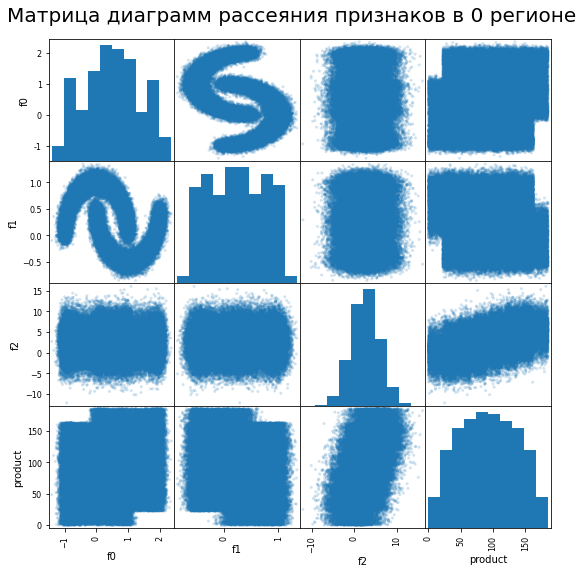

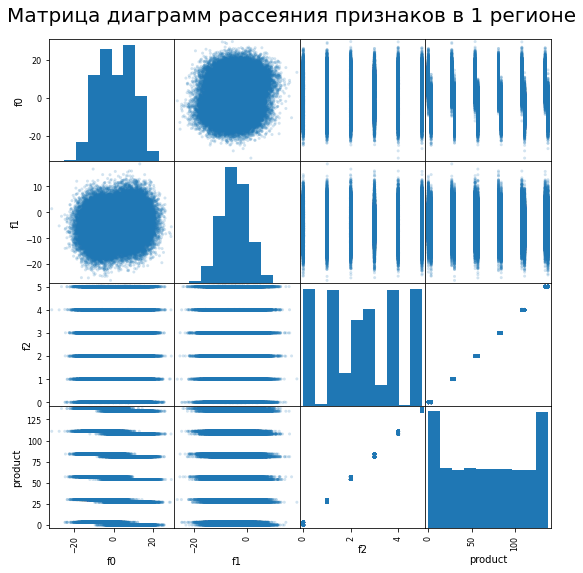

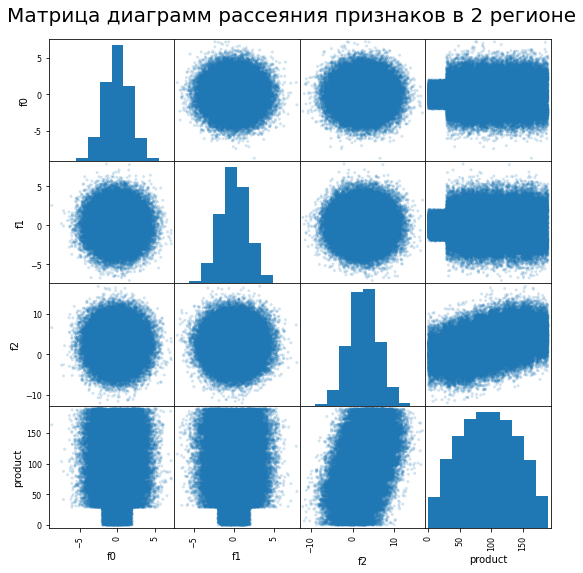

In [13]:
# построение матриц диаграмм рассеяния признаков
for i, j in zip([geo_data_0, geo_data_1, geo_data_2], range(3)):
    pd.plotting.scatter_matrix(i, figsize=(9, 9), alpha=0.2)
    plt.suptitle(f'Матрица диаграмм рассеяния признаков в {j} регионе', y=0.93, fontsize=20)
    plt.show()

На диаграммах подтверждается, то что `product` сильнее всех зависит от признака `f2`, а в первом регионе проглядывается прямая линейная зависимость. 

### Вывод по блоку

Вывод по блоку загрузка и анализ данных:
- данные загрузились корректно;
- пропусков нет, типы данных столбцов соответствуют наполнению, неявных дубликатов нет;
- объемы запасов в нулевом и втором регионе выше чем в первом;
- значения одних и тех же признаков имеют разное распределение и пределы в разных регионах;
- `product` сильнее всех зависит от признака `f2`, а в первом регионе проглядывается прямая линейная зависимость;
- в каждом регионе зависимость целевого признака от входных признаков разная, поэтому для каждого региона обучим свою модель для определения запасов `product`.


<div class="alert alert-block alert-success">
<b>Успех:</b> Данные осмотрены хорошо, особенно радует, что изучены корреляции, так как мы планируем использовать линейные модели, а для них это важно. 
</div>



<div class="alert alert-block alert-info">
<b>Совет:</b>  Советую обратить внимание на библиотеки sweetviz и ydata_profiling помогут в проведении более тщательного EDA анализа. Исследовательский анализ можно делать и с помощью ручного вызова функций дефолтных библиотек. Данные библиотеки хороши для максимизации комфорта презентации результатов анализа бизнес-пользователям.  

Очень просты в использоовании, на вход кладется датафрейм: ydata_profiling.ProfileReport(df) 
</div>


<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> 

Хотел попробовать библиотеку `ydata_profiling`, но не получилось ее импортировать, выдает ошибку:
    
`cannot import name 'Any' from 'typing_extensions' (/opt/conda/lib/python3.9/site-packages/typing_extensions.py)`
    
Вот код:
    
```
! pip install typing-extensions==4.10.0
! pip install ydata-profiling -q
from ydata_profiling import ProfileReport
```
    
Не понял почему не получается ее подключить, в чем проблема?
    
</div>

<div class="alert alert-block alert-success">
    
<b>Ответ[2]:</b> Попробуй перезапустить ядро - у меня  с твоим кодом - все импортировалось 
    
P.S.Главное во время обучения не злоупотреблять, чтобы руки не забыл как делать EDA анализ
</div>


## Обучение и проверка модели

Создадим пайплайн `pipe_final`, который объединит подготовку данных (в нашем случае только масштабирование признаков) и саму модель:

In [15]:
# список столбцов для масштабирования
num_columns = ['f0', 'f1', 'f2']

# пайплайн для масштабирования данных
data_preprocessor = ColumnTransformer(
    [('num', MinMaxScaler(), num_columns)]
)

# итоговый пайплайн:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LinearRegression())
])

Дальше создадим словарь с гиперпараметрами моделей, которые будем пробовать для предсказания объемов запасов `product`:
- `LinearRegression()`:
- `Lasso()`:
    - штраф регуляризации: 0.1, 0.5, 1;
- `Ridge()`:
    - штраф регуляризации: 0.1, 0.5, 1;   
- для всех моделей переберем два варианта масштабирования: `StandardScaler`, `MinMaxScaler`:

In [16]:
param_distributions = [
    
    # словарь для модели LinearRegression() 
    {
        'models':[LinearRegression()], # модель
        'preprocessor__num': [StandardScaler(), MinMaxScaler()] # два варианта масштабирования
    },
    
    # словарь для модели Lasso() 
    {
        'models':[Lasso(random_state = 42)], # модель
        'models__alpha': [0.1, 0.5, 1], # параметр alpha
        'preprocessor__num': [StandardScaler(), MinMaxScaler()] # два варианта масштабирования
    },
    
    # словарь для модели Ridge() 
    {
        'models':[Ridge(random_state = 42)], # модель
        'models__alpha': [0.1, 0.5, 1], # параметр alpha
        'preprocessor__num': [StandardScaler(), MinMaxScaler()] # два варианта масштабирования
    }
]

Дальше создадим функцию `best_model` для выбора лучшей модели на вход которой будем подавать данные о геологоразведки регионов, внутри функции будет происходить разделение на тренировочную и валидационную выборки и выбор лучшей модели с помощью `GridSearchCV`. Функция возвращает валидационную выборку и ее целевой признак, а также лучшую модель и выводит параметры лучшей модели и метрику `RMSE` лучшей модели:

In [17]:
# функция для выбора лучшей модели
def best_model (df):
    # df - исходный датафрейм с целевым признаком

    # разделение на тренировочную и валидационную выборки
    X_train, X_test, y_train, y_test = train_test_split(
        df.drop(['id', 'product'], axis=1),
        df['product'],
        test_size = 0.25, 
        random_state = 42
    )
    
    # выбор лучшей модели с помощью GridSearchCV
    grid_search = GridSearchCV(
        pipe_final,
        param_grid=param_distributions,
        cv=5,
        scoring=make_scorer(mean_squared_error, greater_is_better=False),
        n_jobs=-1
    )

    # обучение лучшей модели на тренировочной выборке
    grid_search.fit(X_train, y_train)

    # вывод параметров лучшей модели и метрики лучшей модели
    print('Лучшая модель и её параметры:\n\n', grid_search.best_estimator_)
    print ('\nМетрика RMSE лучшей модели на тренировочной выборке:', ((-grid_search.best_score_)**0.5).round(2))
    
    return X_test, y_test, grid_search.best_estimator_

Получим параметры лучших моделей и значения метрики `RMSE` на тренировочной выборке для всех трех регионов:

In [18]:
print('Нулевой регион: \n')
X_test_0, y_test_0, model_0 = best_model(geo_data_0)

Нулевой регион: 

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['f0', 'f1', 'f2'])])),
                ('models', Ridge(alpha=0.1, random_state=42))])

Метрика RMSE лучшей модели на тренировочной выборке: 37.67


In [19]:
print('Первый регион: \n')
X_test_1, y_test_1, model_1 = best_model(geo_data_1)

Первый регион: 

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['f0', 'f1', 'f2'])])),
                ('models', LinearRegression())])

Метрика RMSE лучшей модели на тренировочной выборке: 0.89


In [20]:
print('Второй регион: \n')
X_test_2, y_test_2, model_2 = best_model(geo_data_2)

Второй регион: 

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['f0', 'f1', 'f2'])])),
                ('models', Lasso(alpha=0.1, random_state=42))])

Метрика RMSE лучшей модели на тренировочной выборке: 40.03


**Нулевой регион:**
- лучшая модель:
    - `Ridge` с параметром `alpha = 0.1`;
    - масштабирование `MinMaxScaler`;
- `RMSE = 37.67`.

**Первый регион:**
- лучшая модель:
    - `LinearRegression`;
    - масштабирование `MinMaxScaler`;
- `RMSE = 0.89`.

**Второй регион:**
- лучшая модель:
    - `Lasso` с параметром `alpha = 0.1`;
    - масштабирование `StandardScaler`;
- `RMSE = 40.03`.

Теперь создадим функцию `pred`, которая вернет валидационную выборку с реальными значениями `product` и предсказанными лучшей моделью, а также выведет средний запас предсказанного сырья `product_pred` и `RMSE` модели:


<div class="alert alert-block alert-success">
<b>Успех:</b>  Использование пайплайна вместе с кросс-валидацией и препроцессингом - вполне уместен. 
</div> 

In [ ]:
# функция для вывода среднего запаса предсказанного сырья product_pred и RMSE модели
def pred (X_test, y_test, model):
    # X_test - валидационная выборка
    # y_test - целевой признак валидационной выборки
    # model - модель МО
    
    # получение предсказаний
    product_pred = model.predict(X_test)
    
    # объединение входных признаков, целевого и предсказаний
    X_test['product'] = y_test
    X_test['product_pred'] = product_pred
    
    # вывод среднего значения запаса предсказанного сырья и RMSE модели
    print('Cреднее значение запаса предсказанного сырья на валидационной выборке: ', X_test['product_pred'].mean().round(2))
    print('RMSE модели на валидационной выборке: ', mean_squared_error(X_test['product'], 
                                                                       X_test['product_pred'], 
                                                                       squared=False).round(2))
    print('R2 модели на валидационной выборке: ', r2_score(X_test['product'], X_test['product_pred']).round(2))
        
    return X_test

In [ ]:
print('Нулевой регион: \n')
X_test_0 = pred (X_test_0, y_test_0, model_0)

In [ ]:
print('Первый регион: \n')
X_test_1 = pred (X_test_1, y_test_1, model_1)

In [ ]:
print('Второй регион: \n')
X_test_2 = pred (X_test_2, y_test_2, model_2)

Сравним остатки трех моделей:

In [ ]:
# сведение остатков и предсказаний в один датафрейм
residuals = pd.DataFrame({'y_test_0': X_test_0['product'], 
                          'y_pred_0': X_test_0['product_pred'], 
                          'residuals_0': (X_test_0['product'] - X_test_0['product_pred']), 
                          'y_test_1': X_test_1['product'], 
                          'y_pred_1': X_test_1['product_pred'], 
                          'residuals_1': (X_test_1['product'] - X_test_1['product_pred']),
                          'y_test_2': X_test_2['product'], 
                          'y_pred_2': X_test_2['product_pred'], 
                          'residuals_2': (X_test_2['product'] - X_test_2['product_pred']),
                         })

In [ ]:
# построение фигуры для графиков
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

# построение гистограммы частотности распределения
sns.histplot(data=residuals[['residuals_0', 'residuals_1', 'residuals_2']], 
             element="step", 
             fill=False, 
             bins=10, 
             ax=axes[0]
            )
axes[0].set_title('Гистограмма распределения \n остатков трех моделей', fontsize=20)
axes[0].set_xlabel('Остатки', fontsize=15)
axes[0].set_ylabel('Частота', fontsize=15)

# построение диаграмм рассеяния всех трех моделей
for i in range(3):
    sns.scatterplot(data=residuals, x='y_pred_' + str(i), y='residuals_' + str(i), ax=axes[1], label='residuals_' + str(i), 
                    alpha=0.1)
axes[1].set_title('Диаграмма рассеяния \n остатков трех моделей', fontsize=20)
axes[1].set_xlabel('Предсказания модели', fontsize=15)
axes[1].set_ylabel('Остатки', fontsize=15)

plt.show()

По графикам видно, что:
- разброс остатков модели для первого региона одинаков для всех предсказаний;
- остатки моделей нулевого и второго региона на гистограмме распределены равномерно (визуально отрицательных остатков столько же сколько и положительных);
- модели для нулевого и второго региона в предсказаниях до 80 в основном занижают реальные значения, а после 80 больше завышают реальные значения.

Вывод по обучению и проверке модели:
- для всех регионов были выбраны лучшие модели предсказания объемов запаса `product`;
- у нулевого и второго региона `RMSE` модели получилась высокая (37,76 и 40.15 соответственно) и низкая метрика `r2` (0,27 и 0,2 соответственно) это говорит о том, что в 27% и 20% соответственно предсказание модели ближе к истине, чем среднее значение целевого признака;
- у первого региона была сильная зависимость объемов запаса `product` от признака `f2` (коэффициент Фи 0,98), поэтому и модель получилась точнее (`RMSE` - 0,89, `r2` - 1).


<div class="alert alert-block alert-success">
<b>Успех:</b> Шаг проделан лаконично, все метрики посчитаны корректно. Радует наличие анализа остатков - это важно для анализа модели.
</div> 

## Подготовка к расчёту прибыли

Создадим переменные с ключевыми значениями для расчетов:

In [ ]:
# Бюджет на разработку скважин в регионе, руб
BUDGET = 10_000_000_000

# Количество исследуемых точек в регионе, шт
WELLS = 500

# Количество точек выбранных для разработки, шт
WELLS_FINAL = 200

# Доход с одной единицы продукта, руб
INCOME_BARREL = 450000

<div class="alert alert-block alert-info">
    
<b>Совет:</b> Константы принято записывать в ВЕРХНЕМ РЕГИСТРЕ =) Читем здесь https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html#section-29
    
А большие значение можно записывать так: `10_000_000_000`.
</div> 


<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> 

Буду знать, исправил    
</div>

<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> 👍
</div>

Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины:

In [ ]:
print('Достаточный объем сырья для безубыточной разработки новой скважины: ', round(BUDGET / (WELLS_FINAL * INCOME_BARREL), 2))

Вывод:
- средние предсказанные объемы сырья (для нулевого региона - 92.4, первого - 68.71, второго - 94.77) ниже, чем достаточный объем сырья для безубыточной разработки новой скважины, значит для разработки необходимо будет выбирать скважины с наибольшим запасом сырья, а не случайные, чтобы проект был окупаемым.


<div class="alert alert-block alert-info">
<b>Совет:</b> Значение для безубыточной разработки посчитано верно, сравнение проведено, но неплохо было бы добавить, что это может для нас значить
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> 

Дополнил вывод
</div>

<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> С выводом согласен
</div>

## Расчёт прибыли и рисков 

Создадим функцию для расчета прибыли:

In [ ]:
# функция для расчета прибыли самых больших скважин
def income (df, count):
    # df - датафрейм с исследуемми точками в регионе
    # count - количество точек выбранных для разработки
    
    # сортировка df по убыванию объема предсказанного сырья
    df = df.sort_values(by='product_pred', ascending=False).reset_index(drop=True)
    
    # расчет прибыли скважин с самыми большими залежами
    income = df['product_pred'].loc[:count].sum() * INCOME_BARREL - BUDGET
           
    return income

<div class="alert alert-block alert-danger">
<b>Ошибка:</b>

`Прибыль = доходы - расходы` - а у тебя здесь только доходы.

</div>


<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> 

Исправил
</div>

<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> Есть
</div>

Создадим функцию для нахождения средней прибыли, 95%-й доверительного интервала и риска убытков.

In [ ]:
# функция для нахождения средней прибыли, 95%-й доверительного интервала и риска убытков
def final_result (df):
    # df - валидационная выборка с предсказанными объемами запасов сырья
    
    # создание state для фиксации выборок
    state = np.random.RandomState(12345)
    
    # пустой список для прибыли
    values = []
        
    # Bootstrap с 1000 выборок
    for i in range(1000):
        # случайная выборка из 500 точек без повторений
        sample = df.sample(WELLS, replace=True, random_state=state)
        
        # расчет прибыли с помощью функции income
        values.append(income(sample, WELLS_FINAL))
                
    # преобразование прибыли в список
    values = pd.Series(values)
    
    # нахождение средней прибыли
    mean = values.mean()
    
    # нахождение 95% доверительного интервала
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    
    # нахождение квантиля, где прибыль равна капиталовложению
    risk = stats.percentileofscore(values, 0)
    
    # вывод результатов
    print(f'''
    Средняя прибыль: {"{:,.2f}".format(mean).replace(",", " ")}, руб\n
    95% доверительный интервал: ({"{:,.2f}".format(lower).replace(",", " ")}, {"{:,.2f}".format(upper).replace(",", " ")})\n
    Вероятность убытков: {"{:.2f}".format(risk)} %
    ''')


<div class="alert alert-block alert-danger">
<b>Ошибка:</b>

Особенностью техники бутстреп является семплирование с возвратом (`replace = True`, которое нужно явно указать), то есть наблюдение в выборку может попасть несколько раз. Это необходимо для того, чтобы добиться независимости при каждом выборе, иначе вероятность достать элемент из выборки будет с каждым разом увеличиваться. Причем чем больше размер подвыборки, тем выраженнее будет зависимость. Для подвыборки размера 1, например, в крайнем случае, мы возрат можем не делать, так уж и быть, а вот для подвыборки размером с семплируемую, без возврата ну никак не получится получить разнообразные варианты, а подвыборку большего размера вообще — не получить.
    
Все это может показаться немного странным для понимания: как будто одна скважина может буриться несколько раз. Но давай вспомним, что выборка - это лишь некоторое представление о генеральной совокупности. Вполне возможно, что где-то в регионе существуют и другие потенциальные точки добычи, о которых мы даже не подозреваем, но они являются частью генеральной сововкупности. В таком случае повторяющиеся наблюдения можно рассматривать как разные точки добычи из всей генеральной совокупности, просто они имеют близкие характеристики.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> 

Я исходил как раз из этой логики: одна скважина **не может** буриться несколько раз, поэтому и делал сэмплирование без возврата, а теперь понял принцип бутстрепа.
    
Исправил
</div>

<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> Есть контакт
</div>


<div class="alert alert-block alert-info">
<b>Совет: </b>
   
- Вызывая **`st.t.interval(...)`**, ты находишь 95%-доверительный интервал для значения **`средней прибыли`**, то есть промежуток, в котором с большой вероятностью при проведении аналогичных экспериментов окажется **`средняя прибыль`**. По заданию требовалось оценить 95%-доверительный интервал для значения **`прибыли`**, то есть найти такой промежуток, в котором с большой вероятностью окажется **`прибыль`**, случайно выбранного месторождения данного региона. Нижняя граница этого интервала – это 2.5%-квантиль полученных значений прибыли, верхняя граница – 97.5%-квантиль.
    
- После правки ф-ции прибыли, подсчет рисков нужно будет адаптировать под распределение прибыли
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> 

Исправил
</div>

<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> 👍
</div>

Посмотрим на результаты расчетов:

In [ ]:
# вывод прибыли, 95% доверительного интервала и вероятности получения убытков
print('Нулевой регион: \n')
final_result(X_test_0)

In [ ]:
# вывод прибыли, 95% доверительного интервала и вероятности получения убытков
print('Первый регион: \n')
final_result(X_test_1)

In [ ]:
# вывод прибыли, 95% доверительного интервала и вероятности получения убытков
print('Второй регион: \n')
final_result(X_test_2)

Критерии выбора региона:
- вероятность убытков меньше 2.5%;
- регион с наибольшей средней прибылью.

Первому критерию удовлетворяют все регионы, и как ни странно первый регион с самым низким средним значением запаса предсказанного сырья на валидационной выборке (68,71) получился самым прибыльным:
- Средняя прибыль: 467 644 503.82, руб;
- 95% доверительный интервал: (54 468 573.47, 861 215 193.07)
- Вероятность убытков: 1.70 %


<div class="alert alert-block alert-info">
<b>Совет: </b>
    
Не забудь обновить выводы, если потребуется
</div>                                                              


<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> 

Обновил
</div>


<div class="alert alert-block alert-success">
<b>Успех[2]:</b> Отлично, проведено детальное исследование и был выбран правильный регион!
</div>



<div class="alert alert-block alert-info">
<b>Совет[2]: </b> Если интересно изучить тему бутстрапа глубже - я оставлю  ниже несколько интересных и полезных ссылок по теме:
        
1. "Bootstrap Hypothesis Testing in Statistics with Example" 
        
https://www.youtube.com/watch?v=9STZ7MxkNVg
        
2. "How to Calculate Bootstrap Confidence Intervals For Machine Learning Results in Python" 
        
https://machinelearningmastery.com/calculate-bootstrap-confidence-intervals-machine-learning-results-python/
        
3. "A Gentle Introduction to the Bootstrap Method" 

https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/
        
4. "An Introduction to the Bootstrap Method" 
        
https://towardsdatascience.com/an-introduction-to-the-bootstrap-method-58bcb51b4d60#:~:text=The%20basic%20idea%20of%20bootstrap,population%20mean)%20on%20sample%20data.&amp;text=A%20sample%20from%20population%20with%20sample%20size%20n
        
5. "Bootstrapping and Resampling in Statistics with Example" 
        
        
https://www.youtube.com/watch?v=O_Fj4q8lgmc

6. Также одна из программ на рынке по этой теме управлненеческого моделирования - AnyLogic - интересный продукт. Можешь видео из интернета посмотреть по какому-нибудь примеру с её использованием. Тогда тема управленческого моделирования и бутстрапа может по-другому лечь.
</div>


## Общий вывод

В данном проекте было решено две задачи:
- первая: построение модели машинного обучения для предсказания объёма запасов в скважине, которая поможет определить регион, где добыча принесёт наибольшую прибыль;
- вторая: анализ возможной прибыли и рисков техникой *Bootstrap.*

В проекте проделана работа по изучению данных и их предобработке, а именно были:
- были изучены данные с помощью методов `info` и `describe`.

Так же был проведен исследовательский анализ признаков по регионам и выявлено, что:
- значения одних и тех же признаков имеют разное распределение и пределы в разных регионах;
- только во втором регионе все признаки распределены нормально.

Еще был проведен корреляционный анализ и выявлено, что:
- объём запасов в скважине `product` сильнее всех зависит от признака `f2`, а в первом регионе проглядывается прямая линейная зависимость.

**Решение первой задачи:**

Выбор модели предсказания объёма запасов в скважине:
- для всех регионов из трех моделей линейной регрессии были выбраны лучшие модели предсказания объемов запаса `product`:
    - нулевой регион:
        - лучшая модель: `Ridge` с параметром `alpha = 0.1`;
        - масштабирование `MinMaxScaler`;
        - `RMSE = 37.67`
    - первый регион:
        - лучшая модель: `LinearRegression`;
        - масштабирование `MinMaxScaler`;
        - `RMSE = 0.89`
    - нулевой регион:
        - лучшая модель: `Lasso` с параметром `alpha = 0.1`;
        - масштабирование `StandardScaler`;
        - `RMSE = 40.03`;
- у нулевого и второго региона `RMSE` модели получилась высокая, это говорит о том, что при таких зависимостях целевого признака от входных признаков модели сложно подобрать коэффициенты для точных предсказаний;
- у первого региона была сильная зависимость объемов запаса `product` от признака `f2` (коэффициент Фи 0,98), поэтому и модель получилась точнее, `RMSE` всего 0,89.

**Решение второй задачи:**

Анализ возможной прибыли и рисков техникой *Bootstrap.* дал следующие результаты:
- лучшим регионом для разработки скважин стал **первый регион**, он удовлетворяет критериям заказчика:
    - вероятность убытков меньше 2.5%;
    - регион с наибольшей средней прибылью;
- показатели первого региона полученные техникой *Bootstrap.*:
    - Средняя прибыль: 467 644 503.82, руб;
    - 95% доверительный интервал: (54 468 573.47, 861 215 193.07)
    - Вероятность убытков: 1.70 %





<div class="alert alert-block alert-success">
<b>Успех:</b> Всегда приятно наблюдать подробный и структурированный итоговый вывод в конце работы! 
</div>



## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован